### House prices model

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- Load the houseprices data from Thinkful's database.
- Split your data into train and test sets.
- Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
- Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
- Is the performance of your model satisfactory? Why?
- Try to improve your model in terms of predictive performance by adding or removing some variables.

In [4]:
# Load the houseprices data from Thinkful's database.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'  
postgres_pw = '7*.8G9QH21'  
postgres_host = '142.93.121.174'  
postgres_port = '5432'  
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hp_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

hp_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
# Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

hp_sel = hp_df[['saleprice', 'lotfrontage', 'lotarea', 'masvnrarea', 'bsmtfinsf1', 
                'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'garagearea']]
hp_sel.replace(0, 1, inplace=True)
hp_sel.fillna(1, inplace=True)
hp_sellog = np.log(hp_sel)
hp_sellog_picked = hp_sellog[['saleprice', 'firstflrsf', 'grlivarea']]
print(hp_sellog_picked.head())

   saleprice  firstflrsf  grlivarea
0  12.247694    6.752270   7.444249
1  12.109011    7.140453   7.140453
2  12.317167    6.824374   7.487734
3  11.849398    6.867974   7.448334
4  12.429216    7.043160   7.695303


In [6]:
# Let's bring the model with the best performance, 'My model' for this test.

X = hp_sellog_picked[['firstflrsf', 'grlivarea']]
Y = hp_sellog_picked['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

The number of observations in the training set is 730
The number of observations in the test set is 730


In [7]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     473.5
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          2.13e-132
Time:                        09:56:13   Log-Likelihood:                -38.191
No. Observations:                 730   AIC:                             82.38
Df Residuals:                     727   BIC:                             96.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.243     19.091      0.0

In [9]:
# Let's make table to look around at a glance. 

data = [[1.14e-287, 0.596, 144.6, 160.4], [2.13e-132, 0.565, 82.38, 96.16]]
index_name = ['My model', 'Trained Data']
col_name = ['F-test(prob)', 'Adj R-squared', 'AIC', 'BIC']
table = pd.DataFrame(data, index=index_name, columns=col_name)
table

,F-test(prob),Adj R-squared,AIC,BIC
My model,1.140000e-287,0.596,144.60,160.40
Trained Data,2.130000e-132,0.565,82.38,96.16


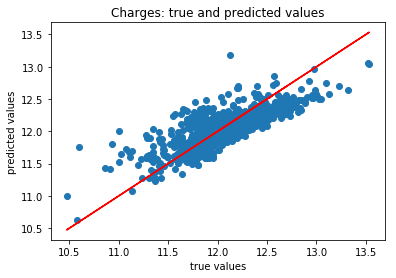

Mean absolute error of the prediction is: 0.19454885467191024
Mean squared error of the prediction is: 0.06405432342016823
Root mean squared error of the prediction is: 0.2530895561262223
Mean absolute percentage error of the prediction is: 1.6201317130592208


In [13]:
# Now, apply this model to the test set.

X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

I think this model works pretty well because the value of metrics are pretty low.  
Also if you look at the graph, you could figure out almost all values are showing good fitting to ideal graph (red line)

Now, let's do one more thing for improving our model.  
I am going to use interaction variable with 'firstflrsf', 'grlivarea' variables.

In [40]:
hp_sellog_picked['first_grl'] = hp_sellog_picked['firstflrsf'] * hp_sellog_picked['grlivarea']
hp_sellog_picked.head()

,saleprice,firstflrsf,grlivarea,first_grl
0,12.247694,6.752270,7.444249,50.265580
1,12.109011,7.140453,7.140453,50.986070
2,12.317167,6.824374,7.487734,51.099093
3,11.849398,6.867974,7.448334,51.154966
4,12.429216,7.043160,7.695303,54.199251


In [41]:
X1 = hp_sellog_picked[['firstflrsf', 'grlivarea', 'first_grl']]
Y1 = hp_sellog_picked['saleprice']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.5, random_state=42)

X1_train = sm.add_constant(X1_train)
results1 = sm.OLS(y1_train, X1_train).fit()

print("The number of observations in the training set is {}".format(X1_train.shape[0]))
print("The number of observations in the test set is {}".format(X1_test.shape[0]))

The number of observations in the training set is 730
The number of observations in the test set is 730


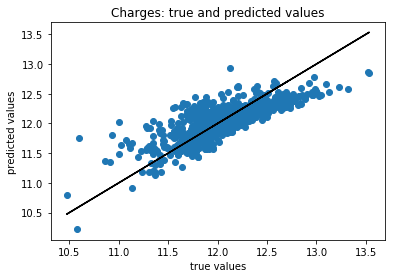

Mean absolute error of the prediction is: 0.19750495609245713
Mean squared error of the prediction is: 0.06512414082301522
Root mean squared error of the prediction is: 0.2551943197310928
Mean absolute percentage error of the prediction is: 1.64492479787849


In [79]:
X1_test = sm.add_constant(X1_test)
y1_preds = results1.predict(X1_test)

plt.scatter(y1_test, y1_preds)
plt.plot(y1_test, y1_test, color='black')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y1_test, y1_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y1_test, y1_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y1_test, y1_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y1_test - y1_preds) / y1_test)) * 100))

**Conclusion: My model's model has the best performance among the models. And its features are so powerful and well present the outcome any other models.**